In [65]:
# Load some test data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

wine = pd.read_csv('/content/wine-training.csv')
wine.head(100)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od,proline,wine
0,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035,0
1,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,2
2,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428,1
3,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718,1
4,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270,0
96,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,2
97,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580,1
98,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105,0


In [66]:
#clean the code

# Drop missing values
wine = wine.dropna().copy()

# Check for duplicate rows
duplicates = wine[wine.duplicated(keep=False)]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Display duplicate rows
print(duplicates)


#show wine column


Number of duplicate rows: 0
Empty DataFrame
Columns: [alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od, proline, wine]
Index: []


<Axes: >

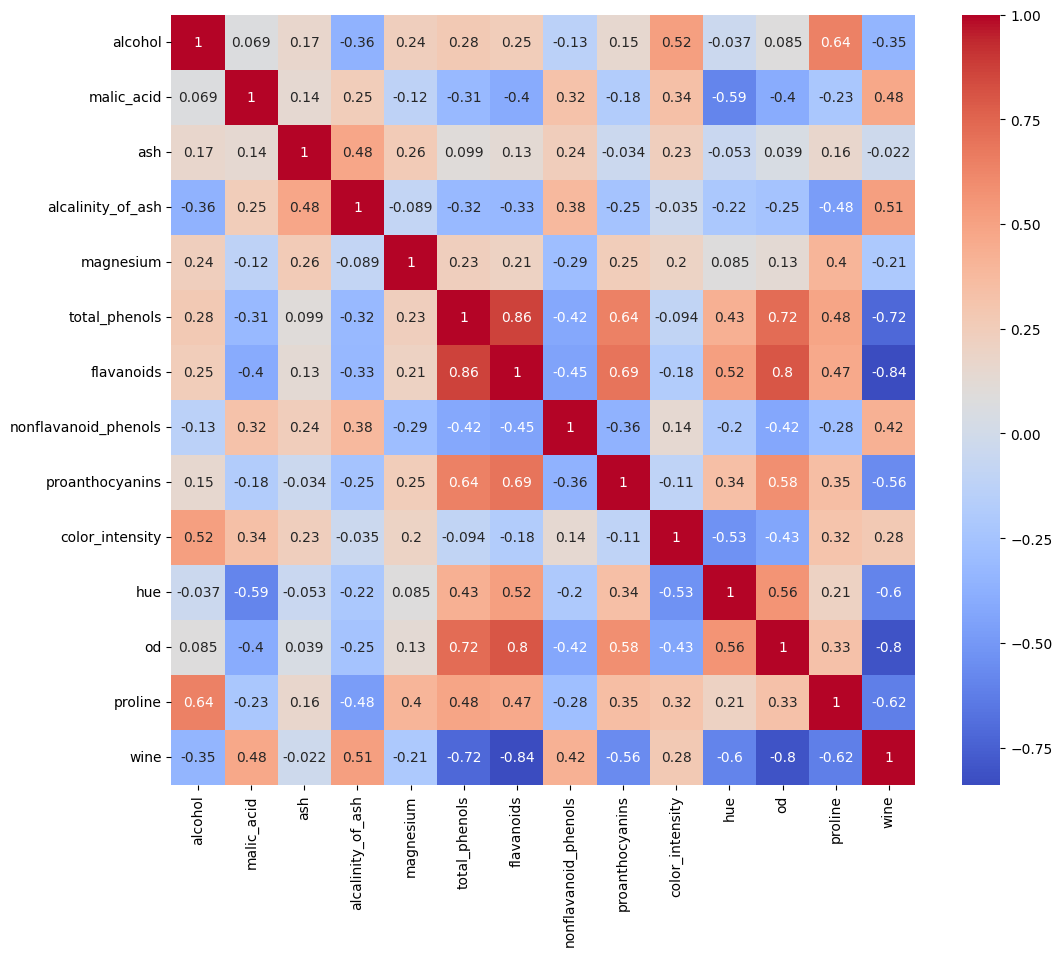

In [67]:
#correlation map graph
#correlation matrix
wine_corr = wine.corr()
plt.figure(figsize=(12,10))
sns.heatmap(wine_corr, annot=True, cmap='coolwarm')

In [68]:
#look at relationships
#flavenol is a type of Phenol so maybe correlation

In [69]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split




# Encode our features and target as needed
features = ['alcohol',	'malic_acid',	'ash',	'alcalinity_of_ash',	'magnesium',	'total_phenols',	'flavanoids',	'nonflavanoid_phenols',	'proanthocyanins',	'color_intensity',	'hue',	'od',	'proline']
X = pd.get_dummies(wine[features], drop_first=True)
y = wine['wine']

# Create a SMOTE object and fit it to the data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution before and after SMOTE
print("Original class distribution:", pd.Series(y).value_counts())
print("Resampled class distribution:", pd.Series(y_resampled).value_counts())

# Split our data into training and test data, with 30% reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30)

# Build the decision tree
clf = RandomForestClassifier()

# Train it
clf.fit(X_train, y_train)


#predict
y_pred = clf.predict(X_test)



#evaluate

rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)



test_data = pd.read_csv("/content/wine-holdout.csv")


#predict
test_data = test_data.reindex(columns=X_train.columns, fill_value=0) # Reorder and add missing columns
test_data = pd.get_dummies(test_data[features], drop_first=True) # Apply get_dummies to test data
predictions = clf.predict(test_data)

#write to file
output = pd.DataFrame({'Class': predictions})
output.to_csv('MarshallPotts-ice1-predictions.csv', index=False)

# Test it
clf.score(X_test, y_test)


Original class distribution: wine
1    47
0    39
2    33
Name: count, dtype: int64
Resampled class distribution: wine
0    47
2    47
1    47
Name: count, dtype: int64
Root Mean Squared Error: 0.15249857033260467
R-squared: 0.9586538461538462


0.9767441860465116

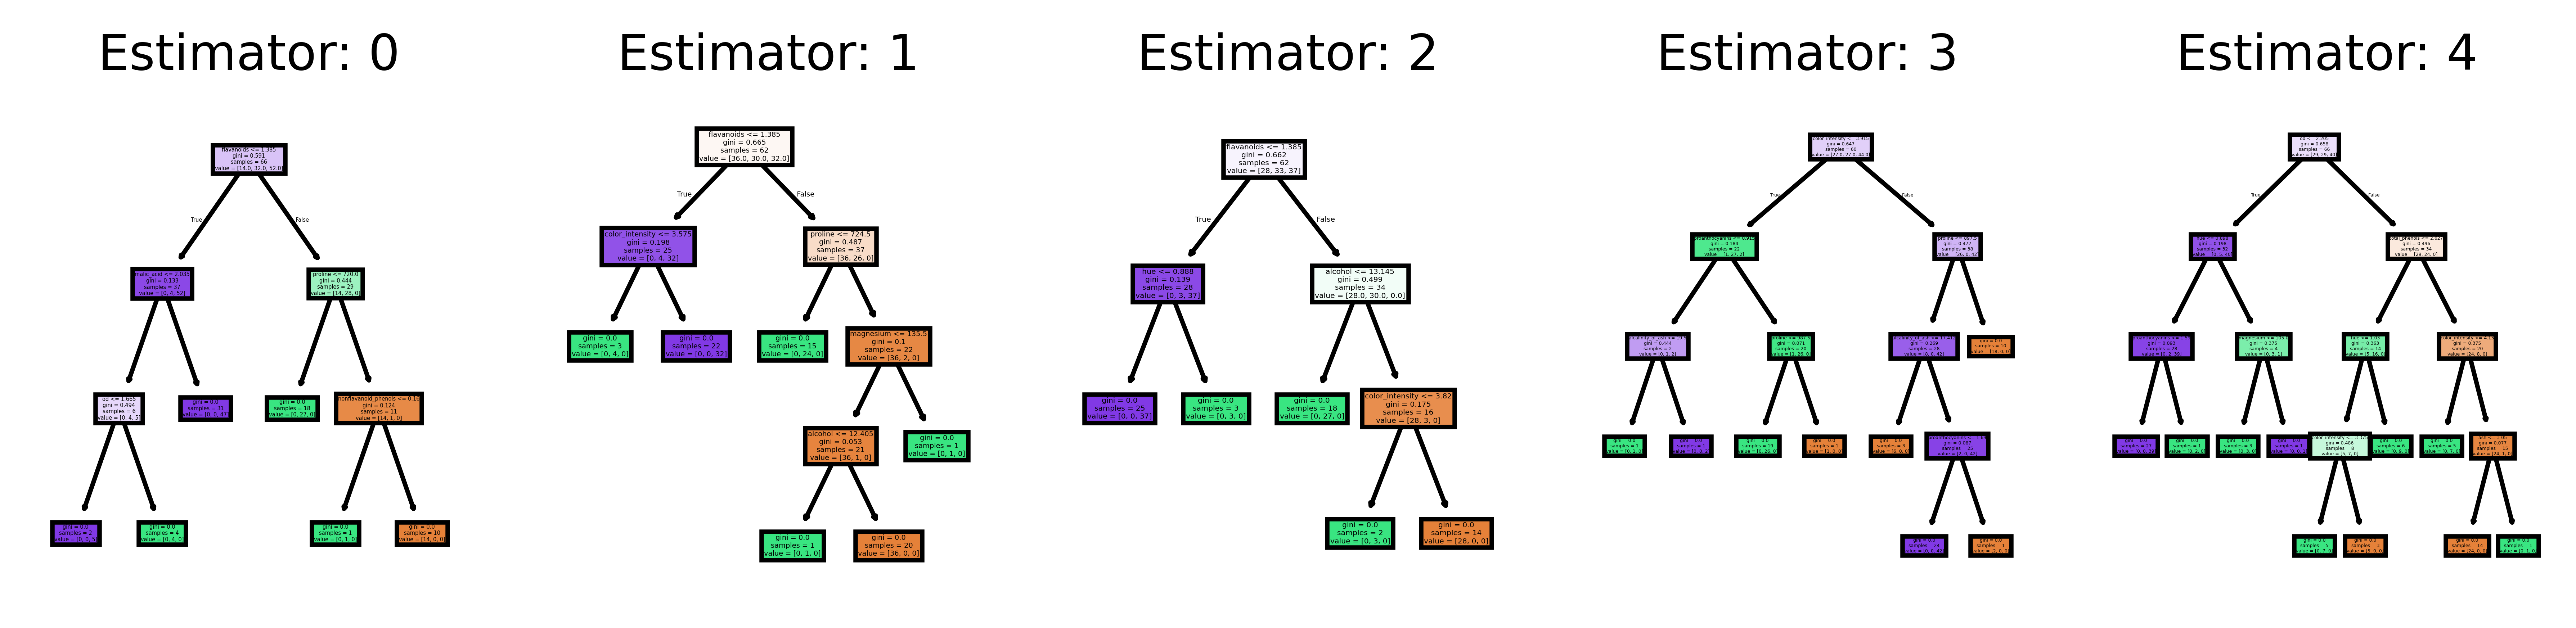

In [70]:
# Let's visualize the tree
import matplotlib.pyplot as plt
# This may not the best way to view each estimator as it is small
fn=X.columns
# cn=y.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = fn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')